In [1]:
## import statements ##

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('polarity.csv')

# Cleaning the data

In [3]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [4]:
import re
def process_tweet(tweet):
    tweet=str(tweet)
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [5]:
def sentiment(label):
    if label<0:
        return -1
    elif label==0:
        return 0
    else:
        return 1

In [6]:
def sentiment_word(sentiment):
    if sentiment==-1:
        return "Negative"
    elif sentiment==1:
        return "Positive"
    else:
        return "Neutral"

In [7]:
train_data['processed_tweets'] = train_data['tweet'].apply(process_tweet)

In [8]:
train_data['sentiment'] = train_data['label'].apply(sentiment)

In [9]:
train_data['tweet_sentiment'] = train_data['sentiment'].apply(sentiment_word)

In [10]:
train_data.head(10)

,label,tweet,processed_tweets,sentiment,tweet_sentiment
0,0.078788,RT @CovidvaxDEL: North delhi has at least 2790...,rt north delhi has at least 2790 new slots ava...,1,Positive
1,0.078788,North delhi has at least 2790 new slots availa...,north delhi has at least 2790 new slots availa...,1,Positive
2,0.078788,East Delhi has at least 5461 new slots availab...,east delhi has at least 5461 new slots availab...,1,Positive
3,0.078788,North delhi has at least 2145 new slots availa...,north delhi has at least 2145 new slots availa...,1,Positive
4,0.400000,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,18 44 bbmp bengaluru covidvaccine availability...,1,Positive
5,0.200000,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,18 44 urban bengaluru covidvaccine availabilit...,1,Positive
6,0.200000,18-44 #RURAL #Bengaluru #CovidVaccine Availabi...,18 44 rural bengaluru covidvaccine availabilit...,1,Positive
7,0.078788,NE delhi has at least 9 new slots available be...,ne delhi has at least 9 new slots available be...,1,Positive
8,0.078788,North delhi has at least 1368 new slots availa...,north delhi has at least 1368 new slots availa...,1,Positive
9,0.062500,RT @adarpoonawalla: An emotional moment for th...,rt an emotional moment for the team at as the ...,1,Positive


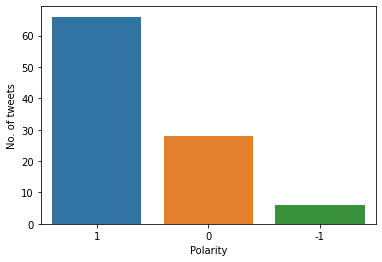

In [11]:
ax=sns.countplot(x = train_data['sentiment'],
              data = train_data,
              order = train_data['sentiment'].value_counts().index)
ax.set(xlabel='Polarity', ylabel='No. of tweets')
fig = ax.get_figure()
fig.savefig('static/images/polaritycurr.png') 

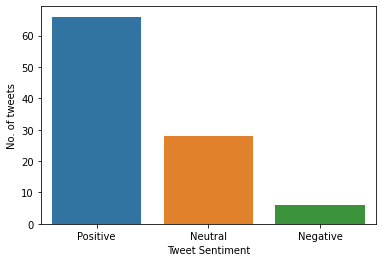

In [12]:
ax=sns.countplot(x = train_data['tweet_sentiment'],
              data = train_data,
              order = train_data['tweet_sentiment'].value_counts().index)
ax.set(xlabel='Tweet Sentiment', ylabel='No. of tweets')
fig = ax.get_figure() 
fig.savefig('static/images/sentimentcurr.png')